In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.cm as cm
%matplotlib inline
import scipy.misc
import Image
import scipy.io
import os


# Make sure that caffe is on the python path:
caffe_root = '/root/caffe'
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

EPSILON = 1e-8

In [2]:
'''
data_root = '/opt/dataset/saliency/msra/Imgs/'
with open('../../../data/msra_b/test.lst') as f:
    test_lst = f.readlines()
    
test_lst = [data_root+x.strip() for x in test_lst]
'''

In [2]:
#remove the following two lines if testing with cpu
caffe.set_mode_gpu()
# choose which GPU you want to use
caffe.set_device(0)
caffe.SGDSolver.display = 0
# load net
net = caffe.Net('deploy.prototxt', 'dss_model_released.caffemodel', caffe.TEST)

In [3]:
#Visualization
def plot_single_scale(scale_lst, name_lst, size):
    pylab.rcParams['figure.figsize'] = size, size/2
    plt.figure()
    for i in range(0, len(scale_lst)):
        s = plt.subplot(1,5,i+1)
        s.set_xlabel(name_lst[i], fontsize=10)
        if name_lst[i] == 'Source':
            plt.imshow(scale_lst[i])
        else:
            plt.imshow(scale_lst[i], cmap = cm.Greys_r)
        s.set_xticklabels([])
        s.set_yticklabels([])
        s.yaxis.set_ticks_position('none')
        s.xaxis.set_ticks_position('none')
    plt.tight_layout()

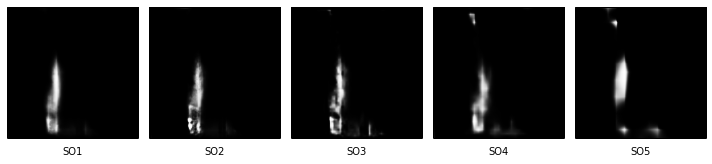

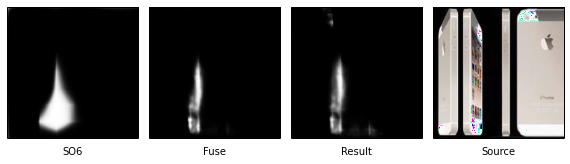

In [5]:
filename='/home/Salient-Object-Detection/data/cdiscount_selected/2738078_3.png'

# load image
img = Image.open(filename)
img = np.array(img, dtype=np.uint8)
im = np.array(img, dtype=np.float32)
im = im[:,:,::-1]
im -= np.array((104.00698793,116.66876762,122.67891434))
im = im.transpose((2,0,1))

# load gt
#gt = Image.open(test_lst[idx][:-4] + '.png')

# shape for input (data blob is N x C x H x W), set data
net.blobs['data'].reshape(1, *im.shape)
net.blobs['data'].data[...] = im
# run net and take argmax for prediction
net.forward()
out1 = net.blobs['sigmoid-dsn1'].data[0][0,:,:]
out2 = net.blobs['sigmoid-dsn2'].data[0][0,:,:]
out3 = net.blobs['sigmoid-dsn3'].data[0][0,:,:]
out4 = net.blobs['sigmoid-dsn4'].data[0][0,:,:]
out5 = net.blobs['sigmoid-dsn5'].data[0][0,:,:]
out6 = net.blobs['sigmoid-dsn6'].data[0][0,:,:]
fuse = net.blobs['sigmoid-fuse'].data[0][0,:,:]
res = (out3 + out4 + out5 + fuse) / 4
res = (res - np.min(res) + EPSILON) / (np.max(res) - np.min(res) + EPSILON)
out_lst = [out1, out2, out3, out4, out5]
name_lst = ['SO1', 'SO2', 'SO3', 'SO4', 'SO5']
plot_single_scale(out_lst, name_lst, 10)
out_lst = [out6, fuse, res, img]
name_lst = ['SO6', 'Fuse', 'Result', 'Source']
plot_single_scale(out_lst, name_lst, 10)


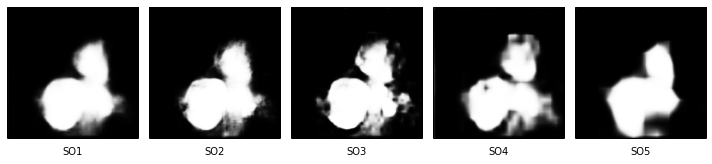

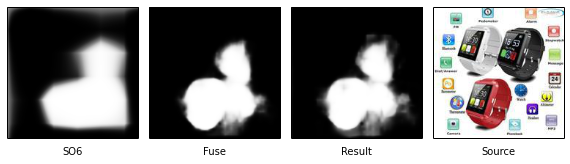

In [8]:
filename='/home/Salient-Object-Detection/data/cdiscount_selected/1581274_1.jpg'

# load image
img = Image.open(filename)
img = np.array(img, dtype=np.uint8)
im = np.array(img, dtype=np.float32)
im = im[:,:,::-1]
im -= np.array((104.00698793,116.66876762,122.67891434))
im = im.transpose((2,0,1))

# load gt
#gt = Image.open(test_lst[idx][:-4] + '.png')

# shape for input (data blob is N x C x H x W), set data
net.blobs['data'].reshape(1, *im.shape)
net.blobs['data'].data[...] = im
# run net and take argmax for prediction
net.forward()
out1 = net.blobs['sigmoid-dsn1'].data[0][0,:,:]
out2 = net.blobs['sigmoid-dsn2'].data[0][0,:,:]
out3 = net.blobs['sigmoid-dsn3'].data[0][0,:,:]
out4 = net.blobs['sigmoid-dsn4'].data[0][0,:,:]
out5 = net.blobs['sigmoid-dsn5'].data[0][0,:,:]
out6 = net.blobs['sigmoid-dsn6'].data[0][0,:,:]
fuse = net.blobs['sigmoid-fuse'].data[0][0,:,:]
res = (out3 + out4 + out5 + fuse) / 4
res = (res - np.min(res) + EPSILON) / (np.max(res) - np.min(res) + EPSILON)
out_lst = [out1, out2, out3, out4, out5]
name_lst = ['SO1', 'SO2', 'SO3', 'SO4', 'SO5']
plot_single_scale(out_lst, name_lst, 10)
out_lst = [out6, fuse, res, img]
name_lst = ['SO6', 'Fuse', 'Result', 'Source']
plot_single_scale(out_lst, name_lst, 10)


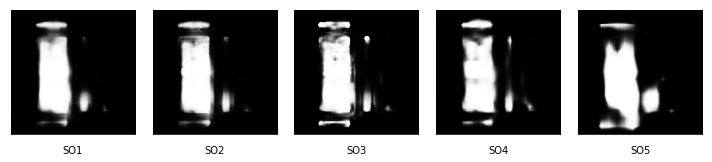

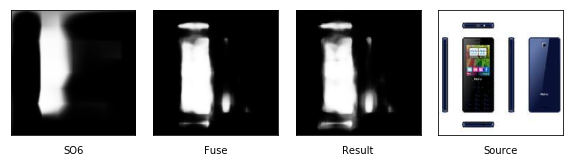

In [9]:
filename='../DeepSaliency/images/2329286_1.png'

# load image
img = Image.open(filename)
img = np.array(img, dtype=np.uint8)
im = np.array(img, dtype=np.float32)
im = im[:,:,::-1]
im -= np.array((104.00698793,116.66876762,122.67891434))
im = im.transpose((2,0,1))

# load gt
#gt = Image.open(test_lst[idx][:-4] + '.png')

# shape for input (data blob is N x C x H x W), set data
net.blobs['data'].reshape(1, *im.shape)
net.blobs['data'].data[...] = im
# run net and take argmax for prediction
net.forward()
out1 = net.blobs['sigmoid-dsn1'].data[0][0,:,:]
out2 = net.blobs['sigmoid-dsn2'].data[0][0,:,:]
out3 = net.blobs['sigmoid-dsn3'].data[0][0,:,:]
out4 = net.blobs['sigmoid-dsn4'].data[0][0,:,:]
out5 = net.blobs['sigmoid-dsn5'].data[0][0,:,:]
out6 = net.blobs['sigmoid-dsn6'].data[0][0,:,:]
fuse = net.blobs['sigmoid-fuse'].data[0][0,:,:]
res = (out3 + out4 + out5 + fuse) / 4
res = (res - np.min(res) + EPSILON) / (np.max(res) - np.min(res) + EPSILON)
out_lst = [out1, out2, out3, out4, out5]
name_lst = ['SO1', 'SO2', 'SO3', 'SO4', 'SO5']
plot_single_scale(out_lst, name_lst, 10)
out_lst = [out6, fuse, res, img]
name_lst = ['SO6', 'Fuse', 'Result', 'Source']
plot_single_scale(out_lst, name_lst, 10)


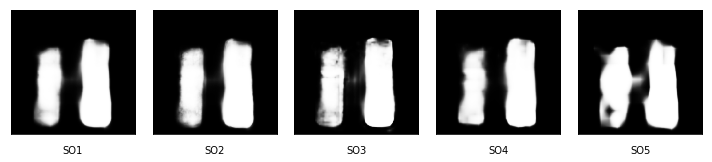

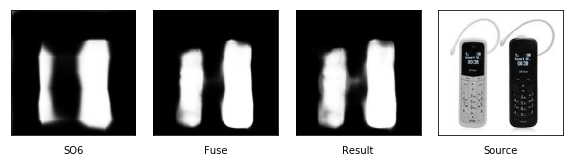

In [10]:
filename='../DeepSaliency/images/2891646_0.png'

# load image
img = Image.open(filename)
img = np.array(img, dtype=np.uint8)
im = np.array(img, dtype=np.float32)
im = im[:,:,::-1]
im -= np.array((104.00698793,116.66876762,122.67891434))
im = im.transpose((2,0,1))

# load gt
#gt = Image.open(test_lst[idx][:-4] + '.png')

# shape for input (data blob is N x C x H x W), set data
net.blobs['data'].reshape(1, *im.shape)
net.blobs['data'].data[...] = im
# run net and take argmax for prediction
net.forward()
out1 = net.blobs['sigmoid-dsn1'].data[0][0,:,:]
out2 = net.blobs['sigmoid-dsn2'].data[0][0,:,:]
out3 = net.blobs['sigmoid-dsn3'].data[0][0,:,:]
out4 = net.blobs['sigmoid-dsn4'].data[0][0,:,:]
out5 = net.blobs['sigmoid-dsn5'].data[0][0,:,:]
out6 = net.blobs['sigmoid-dsn6'].data[0][0,:,:]
fuse = net.blobs['sigmoid-fuse'].data[0][0,:,:]
res = (out3 + out4 + out5 + fuse) / 4
res = (res - np.min(res) + EPSILON) / (np.max(res) - np.min(res) + EPSILON)
out_lst = [out1, out2, out3, out4, out5]
name_lst = ['SO1', 'SO2', 'SO3', 'SO4', 'SO5']
plot_single_scale(out_lst, name_lst, 10)
out_lst = [out6, fuse, res, img]
name_lst = ['SO6', 'Fuse', 'Result', 'Source']
plot_single_scale(out_lst, name_lst, 10)
